<a href="https://colab.research.google.com/github/vo-duy-huynh/python_excel/blob/main/seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas matplotlib seaborn ipywidgets openpyxl
!jupyter nbextension enable --py widgetsnbextension

In [ ]:
!jupyter nbextension enable --py widgetsnbextension --sys-prefix

In [10]:
import pandas as pd
import seaborn as sns
from ipywidgets import interact, widgets
from IPython.display import display
import matplotlib.pyplot as plt

In [6]:
# Load the data
data = pd.read_excel('/content/sample_data/P_Data_Extract_From_World_Development_Indicators.xlsx')

In [7]:
print(data.shape)#in ra kích thước của dữ liệu

(200, 15)


In [11]:
# Tạo hàm vẽ biểu đồ
def plot_chart(selected_country, selected_chart_type, selected_series_code):
    # Chọn dòng có Country Name, Series Code và loại biểu đồ như đã chọn
    selected_data = data[(data['Country Name'] == selected_country) &
                         (data['Series Code'] == selected_series_code)]

    # Xóa cột không cần thiết
    selected_data = selected_data.drop(
        ['Country Name', 'Country Code', 'Series Name', 'Series Code'], axis=1)
    selected_data_long = selected_data.iloc[0]
    selected_data_long.index = selected_data_long.index.str.split(' ').str[0]
    selected_data_long = selected_data_long.reset_index()
    selected_data_long.columns = ['Year', 'Value']

    # Vẽ biểu đồ
    plt.figure(figsize=(12, 6))

    if selected_chart_type == 'Line Chart':
        sns.lineplot(x='Year', y='Value', data=selected_data_long, marker='o')
    elif selected_chart_type == 'Bar Chart':
        sns.barplot(x='Year', y='Value', data=selected_data_long)
    #Biểu đồ tròn
    #elif selected_chart_type == 'Pie Chart':
        #plt.pie(selected_data_long['Value'], labels=selected_data_long['Year'], autopct='%1.1f%%', startangle=140)
        #plt.title(f'{selected_country} - {selected_series_code} - Pie Chart')
        #plt.show()

    plt.title(f'{selected_country} - {selected_series_code}')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()

interactive(children=(Dropdown(description='selected_country', options=('Australia', 'Argentina', 'Cambodia', …

<function __main__.plot_chart(selected_country, selected_chart_type, selected_series_code)>

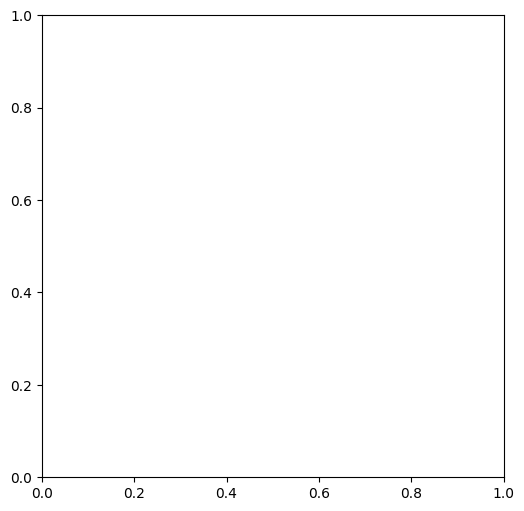

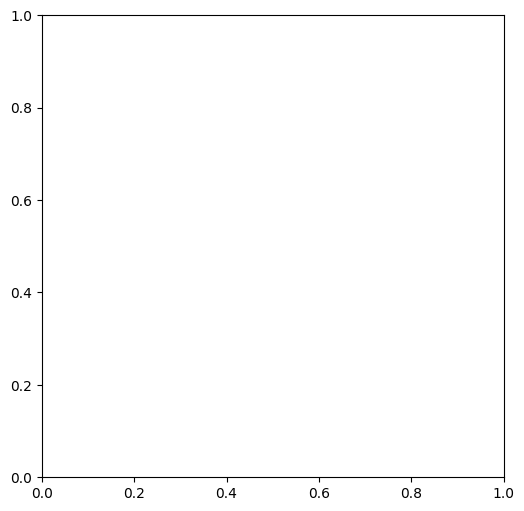

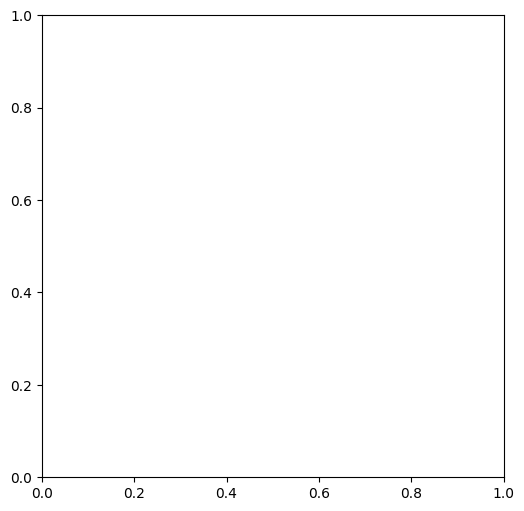

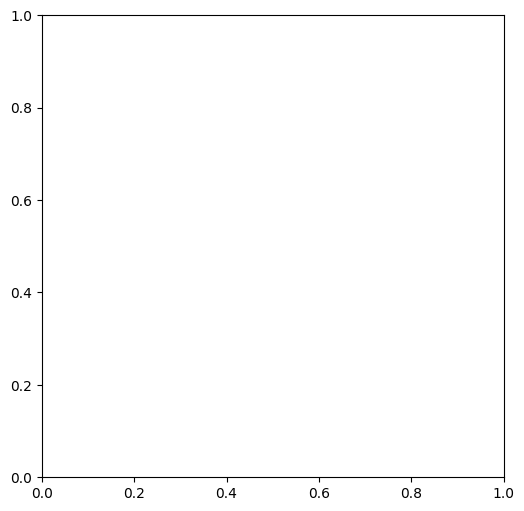

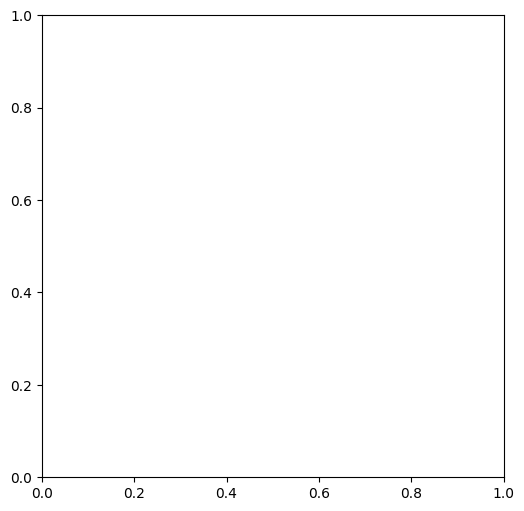

In [13]:
# Liên kết hàm vẽ biểu đồ với sự kiện chọn quốc gia, loại biểu đồ, và Series Code
interact(plot_chart, selected_country=data['Country Name'].unique(),
         selected_chart_type=['Line Chart', 'Bar Chart'],
         selected_series_code=data['Series Code'].unique())